# Mini Projeto - Machine Learning

## 2ª Etapa: Classificação dos dígitos 1 x 5

### Vizualização de todos os dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from linear_models import *
from utils import *
from sklearn.metrics import classification_report

In [2]:
new_train_df = pd.read_csv('./dados/train_reduced.csv')
new_test_df = pd.read_csv('./dados/test_reduced.csv')

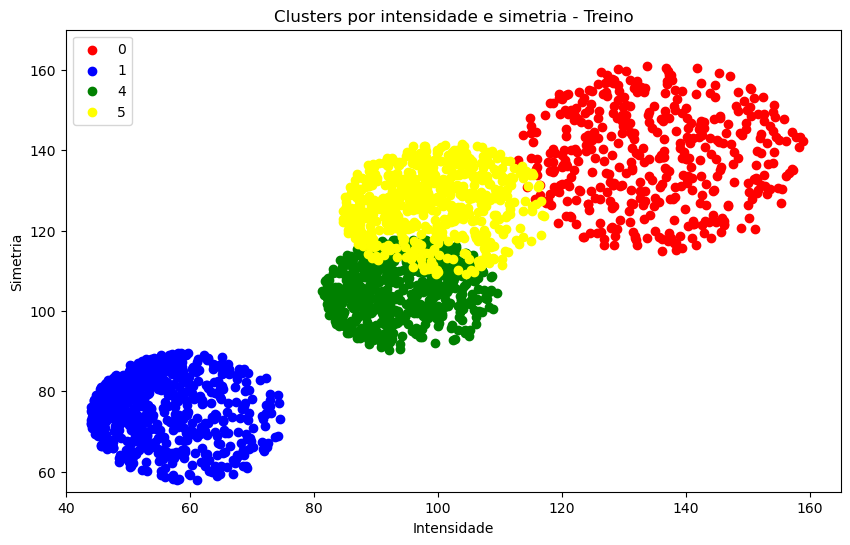

In [3]:
plot_classification_digits(new_train_df, [0, 1, 4, 5],
                            ['red', 'blue', 'green', 'yellow'],
                              'Clusters por intensidade e simetria - Treino')

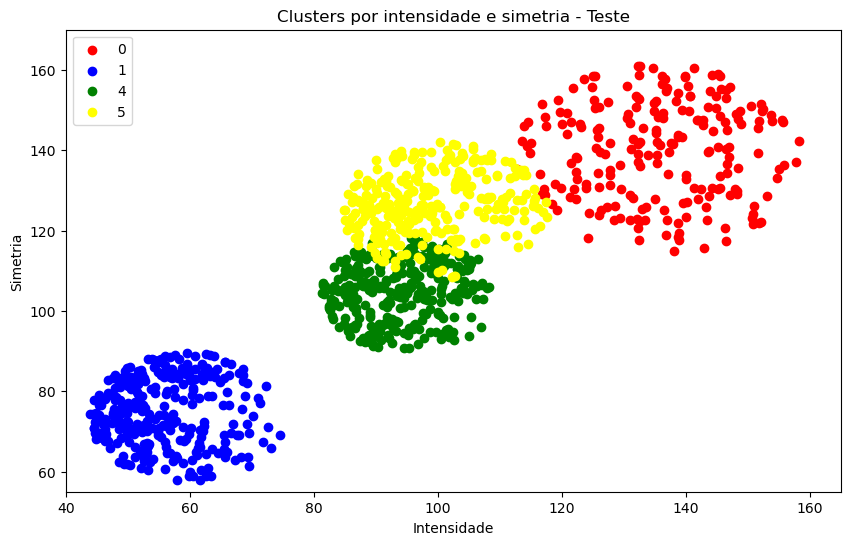

In [4]:
plot_classification_digits(new_test_df, [0, 1, 4, 5],
                            ['red', 'blue', 'green', 'yellow'],
                              'Clusters por intensidade e simetria - Teste')

In [5]:
mask1 = new_train_df['label'] == 5
mask2 = new_train_df['label'] == 1
mask3 = new_test_df['label'] == 5
mask4 = new_test_df['label'] == 1

In [6]:
train1x5 = new_train_df[mask1 | mask2]
test1x5 = new_test_df[mask3 | mask4]

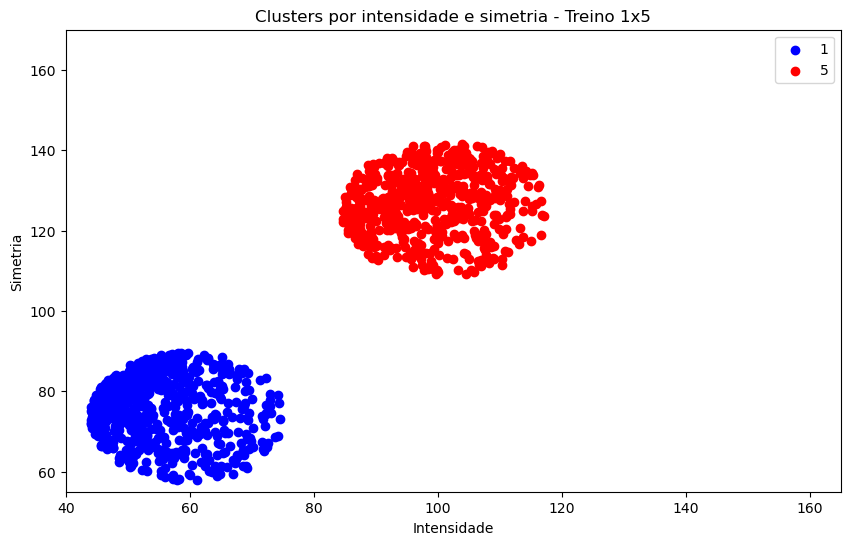

In [7]:
plot_classification_digits(train1x5, [1, 5],[ 'blue', 'red'], 'Clusters por intensidade e simetria - Treino 1x5')

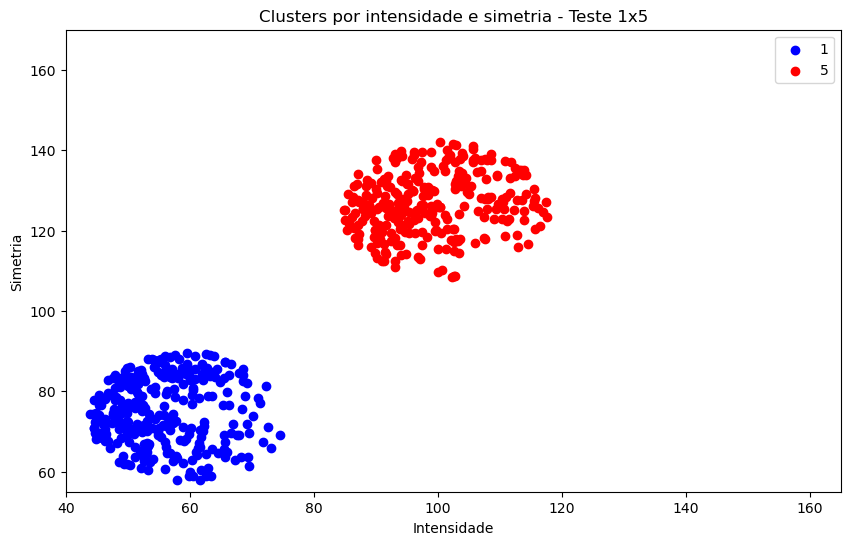

In [8]:
plot_classification_digits(test1x5, [1, 5],[ 'blue', 'red'], 'Clusters por intensidade e simetria - Teste 1x5')

In [9]:
X_train = train1x5[['intensidade', 'simetria']]
X_train = X_train.to_numpy()
X_train = np.c_[np.ones(X_train.shape[0]), X_train]
X_test = test1x5[['intensidade', 'simetria']]
X_test = X_test.to_numpy()
X_test = np.c_[np.ones(X_test.shape[0]), X_test]

y_train = [1 if label == 1 else -1 for label in train1x5.label]
y_test = [1 if label == 1 else -1 for label in test1x5.label]


### Relatorio Modelos

Counter({1: 292, -1: 291})
RELATORIO CLASSIFICACAO BINARIA
one_label:  292
zero_label:  291
VP: 292
VN: 291
FP: 0
FN: 0
Binary Error: 0.0
Acurracy: 1.0
positive precision:  1.0
negative precision:  1.0
positive recall:  1.0
negative recall:  1.0
positive f1 score:  1.0
negative f1 score:  1.0
weighted_f1_score:  1.0


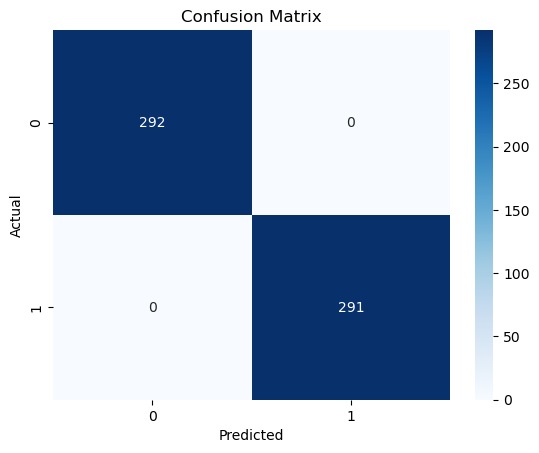

In [10]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
ypred = linear_reg.predict(X_test)
print_metrics(y_test, ypred)

100%|██████████| 1000/1000 [00:02<00:00, 431.30it/s]


Counter({1: 292, -1: 291})
RELATORIO CLASSIFICACAO BINARIA
one_label:  292
zero_label:  291
VP: 292
VN: 291
FP: 0
FN: 0
Binary Error: 0.0
Acurracy: 1.0
positive precision:  1.0
negative precision:  1.0
positive recall:  1.0
negative recall:  1.0
positive f1 score:  1.0
negative f1 score:  1.0
weighted_f1_score:  1.0


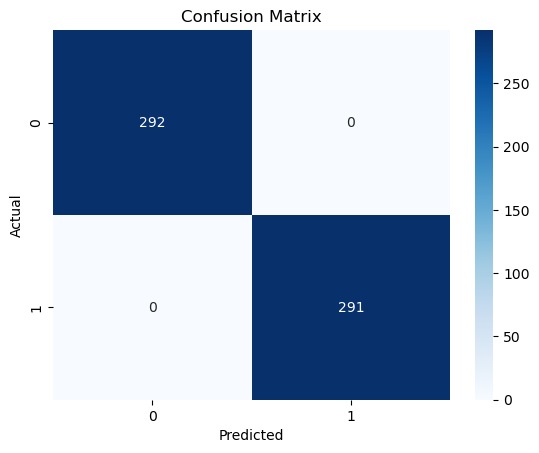

In [11]:
pocket_pla = PocketPLA(1000, Nmin=100, Nmax=300)
pocket_pla.fit(X_train, y_train)
ypred = pocket_pla.predict(X_test)
print_metrics(y_test, ypred)

  0%|          | 0/40000 [00:00<?, ?it/s]c:\Users\Guilherme\Documents\Faculdade\p5\projetoML\linear_models.py:96: RuntimeWarning: overflow encountered in exp
  sigm = 1 / (1 + np.exp(y_batch.reshape(-1, 1) * np.dot(w, X_batch.T).reshape(-1, 1)))
100%|██████████| 40000/40000 [00:06<00:00, 6118.18it/s]


Counter({1: 292, -1: 291})
RELATORIO CLASSIFICACAO BINARIA
one_label:  292
zero_label:  291
VP: 292
VN: 291
FP: 0
FN: 0
Binary Error: 0.0
Acurracy: 1.0
positive precision:  1.0
negative precision:  1.0
positive recall:  1.0
negative recall:  1.0
positive f1 score:  1.0
negative f1 score:  1.0
weighted_f1_score:  1.0


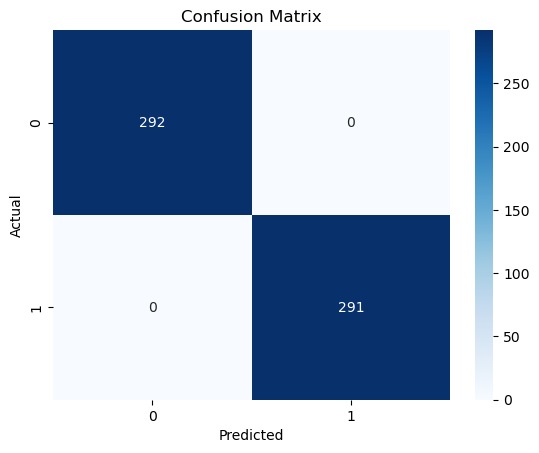

In [12]:
logistic_reg = LogisticRegression(tmax=40000)
logistic_reg.fit(X_train, y_train)
ypred = logistic_reg.predict(X_test)
print_metrics(y_test, ypred) 
# w_logistic = logistic_reg.get_w()
# plot_classification_digits(test1x5, [1, 5],[ 'blue', 'red'], 'LOGISTICA - Classificacao - Teste 1x5', [w_logistic])

In [13]:
w_lin = linear_reg.get_w()
w_pocket = pocket_pla.get_w()
w_logistic = logistic_reg.get_w()

### Comparação entre as retas classificadoras

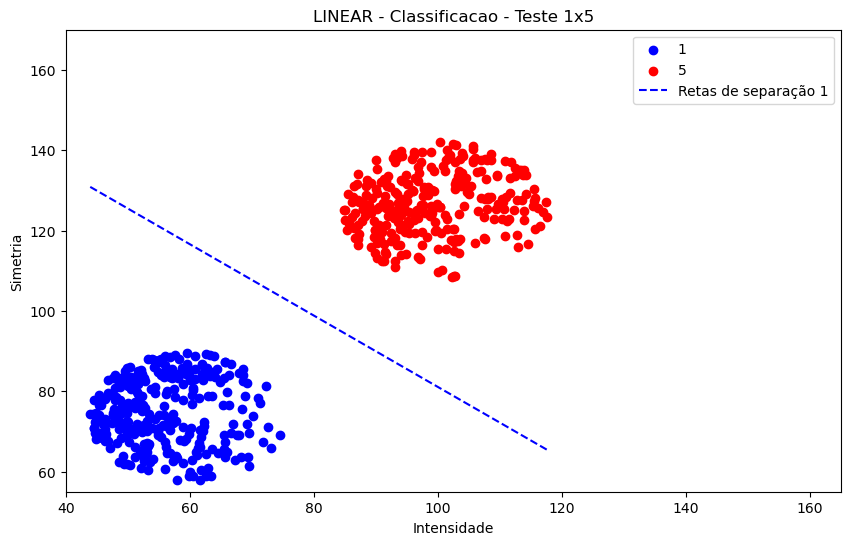

In [14]:
plot_classification_digits(test1x5, [1, 5],[ 'blue', 'red'], 'LINEAR - Classificacao - Teste 1x5', [w_lin])


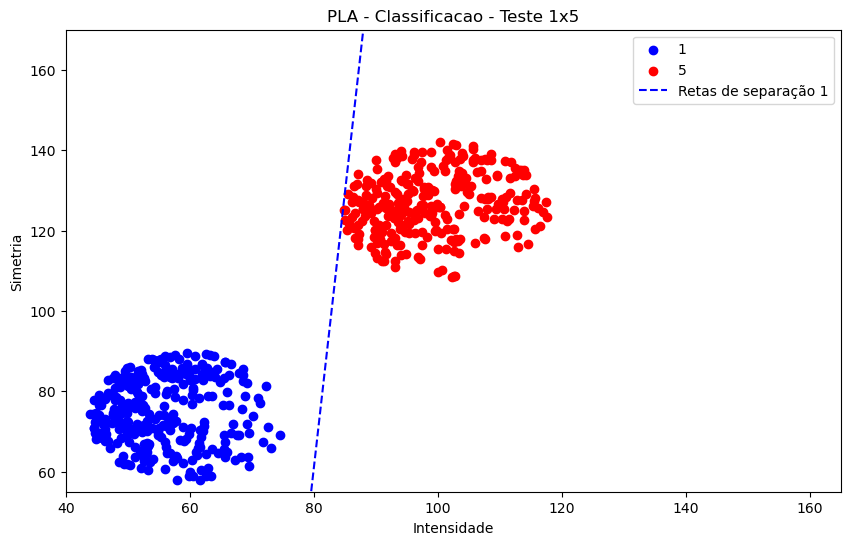

In [15]:
plot_classification_digits(test1x5, [1, 5],[ 'blue', 'red'], 'PLA - Classificacao - Teste 1x5', [w_pocket])

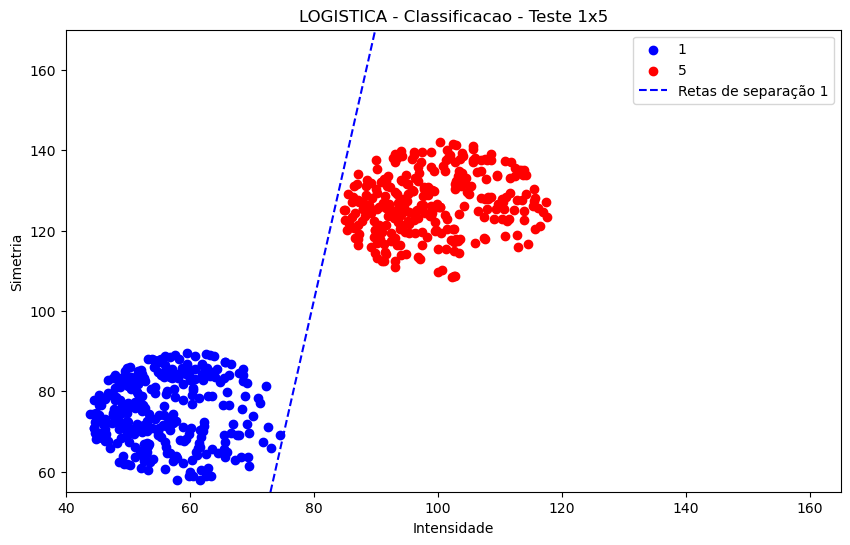

In [16]:
plot_classification_digits(test1x5, [1, 5],[ 'blue', 'red'], 'LOGISTICA - Classificacao - Teste 1x5', [w_logistic])